In [1]:
!pip install summarytools
!pip install skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.7.1
    Uninstalling polars-1.7.1:
      Successfully uninstalled polars-1.7.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykern

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mn
from skimpy import skim
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from summarytools import dfSummary
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [4]:
df = pd.read_csv("UniversalBank.csv")

In [7]:
df = df.set_index('ID')

In [8]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 45.3 (11.5)min < med < max:23.0 < 45.0 < 67.0IQR (CV) : 20.0 (4.0),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACl0lEQVR4nO3czYraUBiA4e/UcYgKCSLozhsodOHSi+jF9hK68Aq8A3eCSMR0gjGmmxbKMFVzfibnC++zPyaLl3B+Ek3TNALE7kvXNwA846XrG4BfxpiRiLxaDr80TfPm8358IdQeMcaMZrPZ9zRNpzbjT6fT0RjzI8ZYCbVfXtM0na7X67csy8o2A/M8TzabzfRwOLyKCKEivCzLyvl8/sti6Mj7zXjCYgoqRP1E7evCAO1FG2qfFwZoL9pQpccLA7QXc6gionNhwJTFv+hD1YYpSxiE6h9TlgAINRCNU5aYsY8KFQgVKhAqVGCO+h8OW0zp7XYb2l63ruuhiKTGGJvhTteOGaF+wGWLqaqqpK7rr2VZ/hSRVoupoiiGVVV9Wy6Xg8Fg0GrHwPXasSPUj1lvMe12u+l2ux1fr9dB24teLpeXJEnGq9WqXCwWx7bjXa4t4vw0Fwl4WEGod9hsMR2PR+ftpclkYrW15XJt16e5SNjDiqChOh4l9na+FSPXp3now4pgoboeJbrOt1iU2LF9mv8R7LAi5BPVep4n4jbfYlHSP8HnqLZHiS7zra4XJfCv14upLhYlCIOTKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCr1+ewqfy/Fl9bvfWxEqvHB9Wf3R91aECi9cXlZ/5nsrQoVXDt9c3X1Z/WGoXf1jCPCvu6F29Y8hwHuPnqid/GMI8N5Tc9Su/jEE+IsNf6hAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWe+lw6z/Ok7Q+fz+dERKQoimS/348/c7zWa2u9b9fxz/T1G3IUsuNAX/gHAAAAAElFTkSuQmCC"">",0(0.0%)
2,Experience[int64],Mean (sd) : 20.1 (11.5)min < med < max:-3.0 < 20.0 < 43.0IQR (CV) : 20.0 (1.8),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqUlEQVR4nO3dzaraQBiA4W/qUUaFBH/QnTdwoAvBjRfQZS+2l9CFi669A3eCSMT0BGNMNxX6h+b3ZL70ffZjQngdkyAzJk1TAVz3oekTALJ4afoE8DtjTF9EeiU+4pKm6VtV5+MKQq1BidjseDz+5Pv+sOixT6fT0RjzpW2xEmrFjDH9yWTy2fO8Ud6xcRxbEXldrVbfptPpKe/4IAjsZrMZHQ6HnogQKh7qeZ43Wq/Xb77vR3kG7na70Xa7HVhr49ls9r3g8fsFxzmNUGvi+36UN7bj8djKyKrAUz9UIFSoUOtPP69aUJXaQi3z9HvX1lctrnJ5YqlzRi389CtS/lWLyxfdRa5PLLU/9Rd5+v1Foadg1y+6oxqdWJ5p6+sppy+6y5qYWLJoa6gi4u5FR368noIKrZ5Ry0iSpCsinjEm71Dvdrt1azil/xqh/kMYht04jj8uFotOp9PJdY8bx7FNkuQ1iqKvIlL0tgN/cDrUpma1y+XyYq0dLJfLaD6fH/OMvf+x5Hq9dooeH39zNlQXZrXhcKjujyVtvWVxNlRmtfxc+HLXxdlQ7zTOak1p85fb+VCRXxu/3LxHhQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChVY0geVKbGSoMiTXWiehlpiGxynlzFEtcqsJCjyfBeah6GW3dLb5WUMUa0yKwlm2YXm2YxaektvV5cxRD2KrCT408PVBDPdo7KlN5rGUz9UIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUy/R81CAKb94PP57MVEQnD0O73+8F7jtd6bK3nXXZ8lr5+AALbpKa2bWTBAAAAAElFTkSuQmCC"">",0(0.0%)
3,Income[int64],Mean (sd) : 73.8 (46.0)min < med < max:8.0 < 64.0 < 224.0IQR (CV) : 59.0 (1.6),162 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACn0lEQVR4nO3cP24aQRiG8XeCsQaj7AqwcOcLWEqB5IYDpMxhc4QUFK65gRuEZCGQiRHLmjRxEcWy2T8Tzzd5fv2yWzyCj9ndccfjUUDsPn30BQCnOAv54c65nqTzBh+xPx6PT21dD+wKFqpzrjcajb5lWTao+xmbzWblnPtOrAj5jXqeZdlgOp0+5Xm+q3rwer32s9ls8PDwcC6JUP9zQX/6JSnP8914PP5Z8/BeqxcDs/gzBRMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYEPyhlI/Cs7BpiTrUsiy7kjLnXNVD/XA4/Jrneb/uuXkWNi7RhrrdbrtFUXy5vr7udDqdSs+zFkXhJd3c3t7eXV5ebqqem2dh4xNtqPv9/sx7fzGZTHZXV1erKsfe398P5vP5hfe+4FnYNEQb6ot+v1/5wevVakVkiXk31AZ/SrLn5+dujeOAv7wZapMX9Iqi8GVZ3ux2ux+S6v78ApLe/0at/YLey5x4OBw6Da4PkHTijFrnBT3mRLSJO1MwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ0W9A8VEa7HslscFa6wj1FU32vZLYYC0EQn1Fk32v2GAtDEJ9Q519r35jT4OWEWoAzLftI9SWMd+GQagtY74Ng1ADqTvflmWZqf7YICU6OhBqRJqODVK6owOhRqTJ2CClPToQaoQaLItJiS6NEWpiUl0aI9SEpLw0RqgJSXlpjFATlOLSGKFCUvxLY4QKSfEvjREq/hDr0hivosAEQoUJhAoTmFHRmpB3xU4Kdb1e+6pnfXx89JK03W79crm8+JfHWz231euWpMVi8TnkXbFfwNullpSitb8AAAAASUVORK5CYII="">",0(0.0%)
4,ZIP Code[int64],Mean (sd) : 93152.5 (2121.9)min < med < max:9307.0 < 93437.0 < 96651.0IQR (CV) : 2697.0 (43.9),467 distinct values,"<img src = ""data:image/png;base64

In [10]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5000   │ │ int64       │ 12    │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Age                   │   0 │     0 │   45.34 │   11.46 │    23 │     35 │     45 │    55 │    67 │ ▅▇▇▇▇▅ │  │
│ │ Experience            │   0 │     0 │    20.1 │   11.47 │    -3 │     10 │     20 │    30 │    43 │ ▃▇▇▇▇▃ │  │
│ │ Income                │   0 │     0 │   73.77 │   46.03 │     8 │     39 │     64 │    98 │   224 │ ▇▇▅▂▂  │  │
│ │ ZIP Code              │   0 │     0 │   93150 │    2122 │  9307 │  91910 │  93440 │ 94610 │ 96650 │      ▇ │  │
│ │ Family                │   0 │     0 │   2.396 │   1.148 │     1 │      1 │      2 │     3 │     4 │ ▇ ▇ ▅▇ │  │
│ │ CCAvg                 │   0 │     0 │   1.938 │   1.748 │     0 │    0.7 │    1.5 │   2.5 │    10 │  ▇▅▁▁  │  │
│ │ Education             │   0 │     0 │   1.881 │  0.8399 │     1 │      1 │      2 │     3 │     3 │ ▇  ▅ ▆ │  │
│ │ Mortgage              │   0 │     0 │    56.5 │   101.7 │     0 │      0 │      0 │   101 │   635 │  ▇▂▁   │  │
│ │ Personal Loan         │   0 │     0 │   0.096 │  0.2946 │     0 │      0 │      0 │     0 │     1 │ ▇    ▁ │  │
│ │ Securities Account    │   0 │     0 │  0.1044 │  0.3058 │     0 │      0 │      0 │     0 │     1 │ ▇    ▁ │  │
│ │ CD Account            │   0 │     0 │  0.0604 │  0.2383 │     0 │      0 │      0 │     0 │     1 │ ▇    ▁ │  │
│ │ Online                │   0 │     0 │  0.5968 │  0.4906 │     0 │      0 │      1 │     1 │     1 │ ▅    ▇ │  │
│ │ CreditCard            │   0 │     0 │   0.294 │  0.4556 │     0 │      0 │      0 │     1 │     1 │ ▇    ▃ │  │
│ └───────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

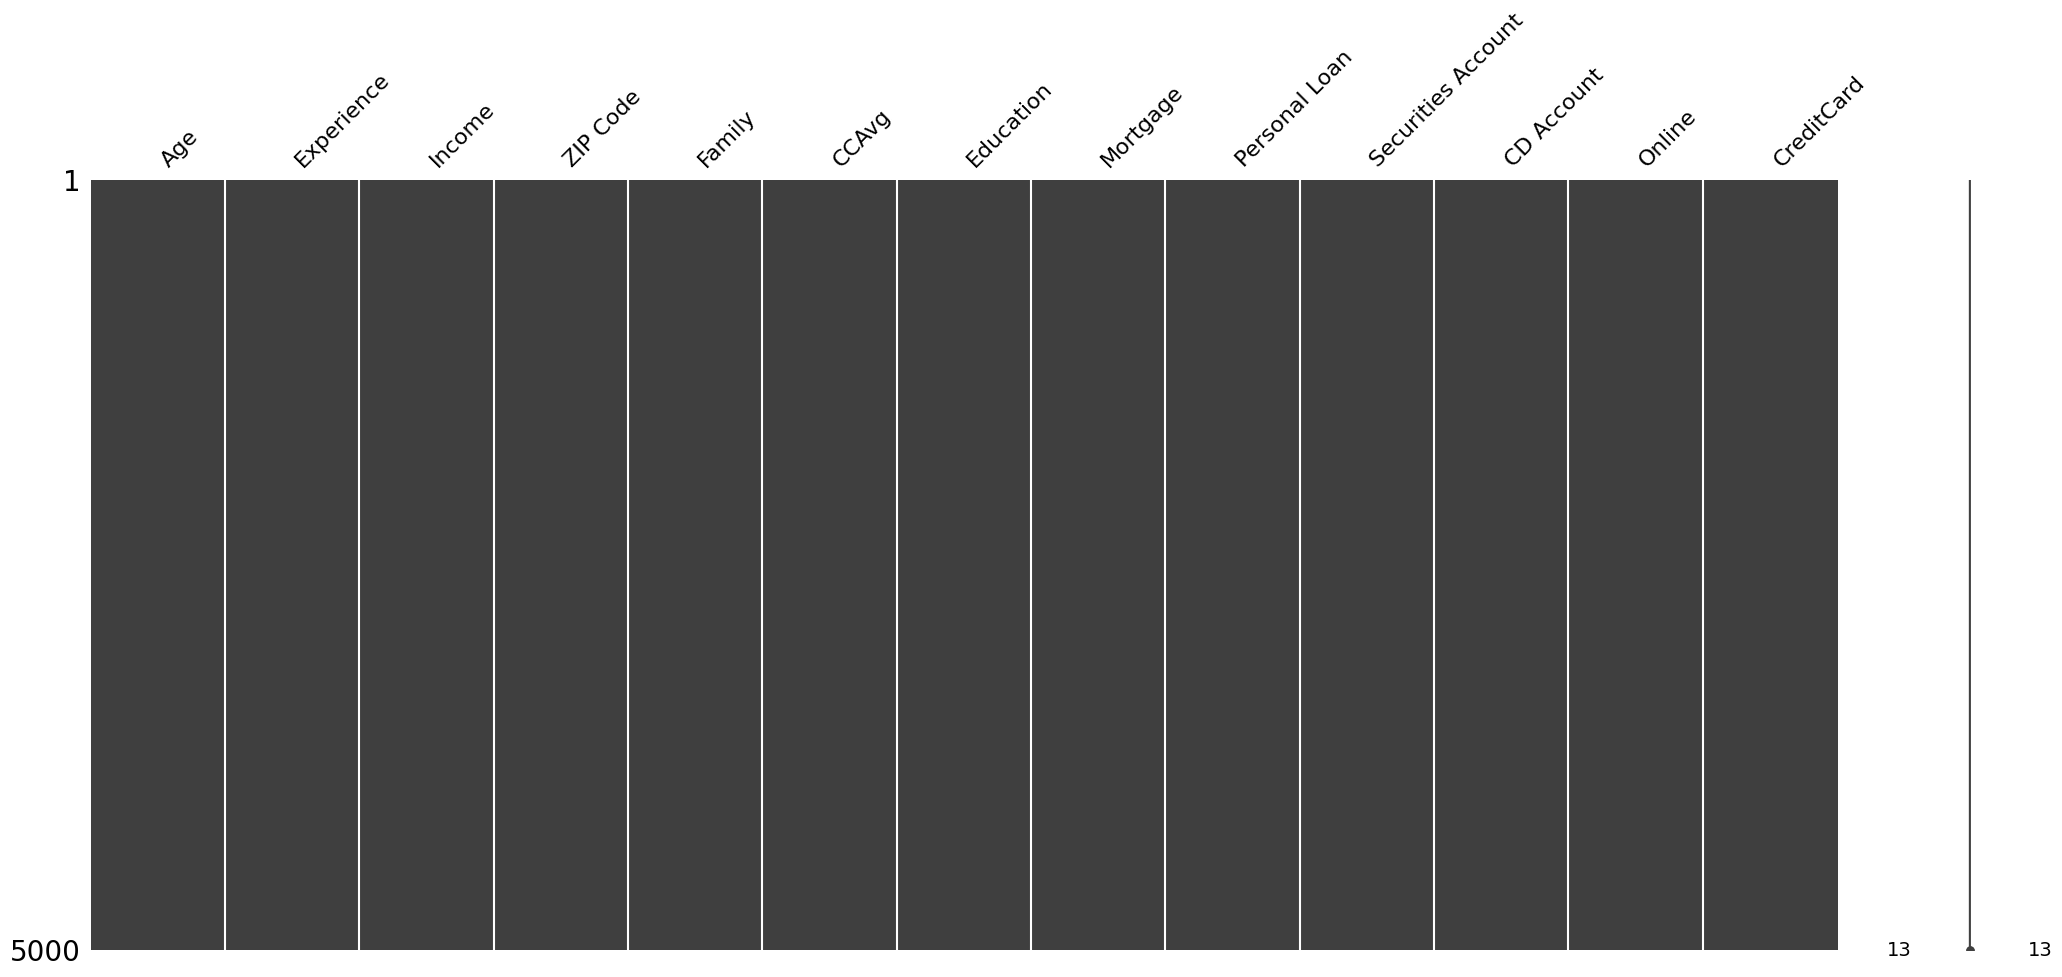

In [12]:
mn.matrix(df)

In [13]:
df_temp = df.copy()

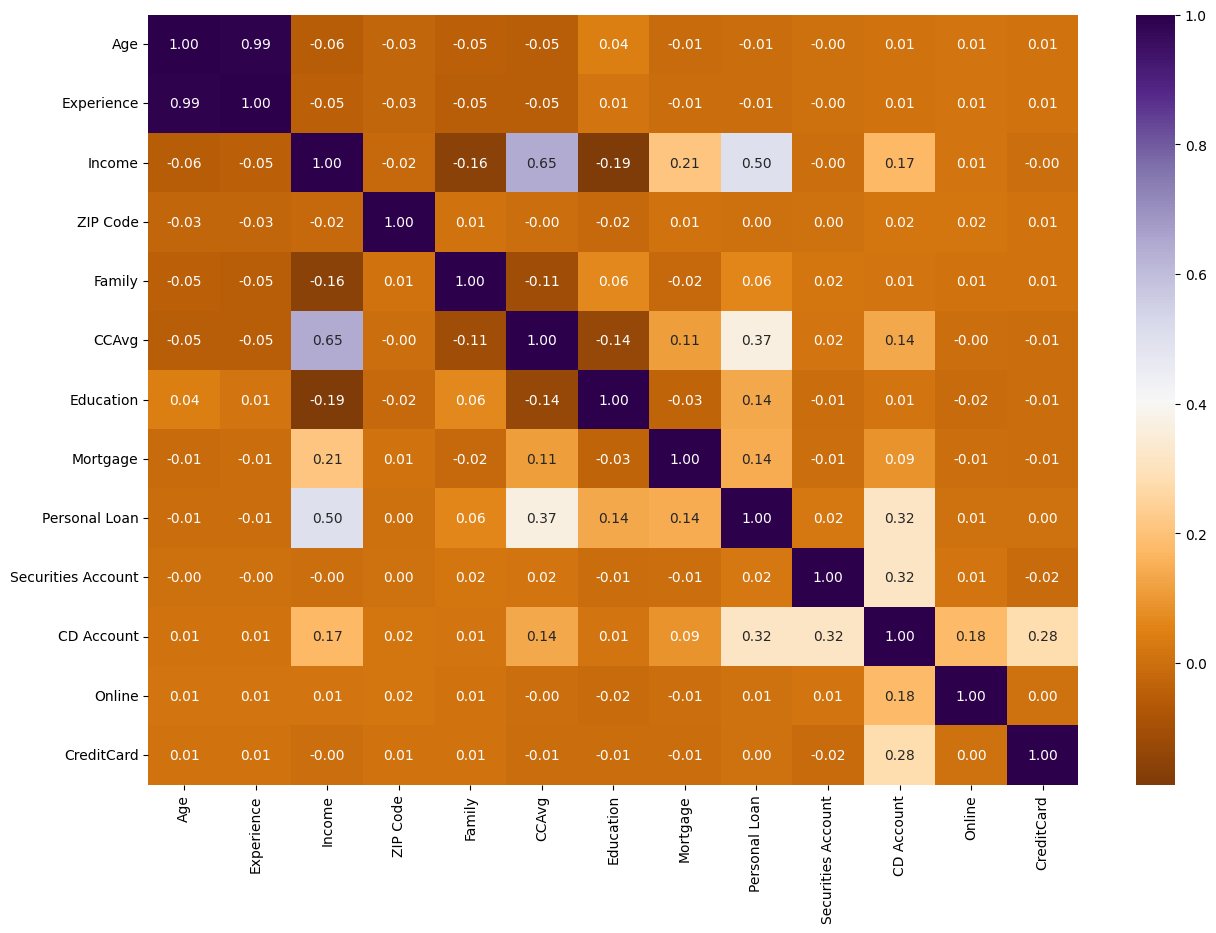

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(data= df_temp.corr(), cmap = "PuOr", annot = True ,fmt= ".2f")
plt.show()

In [16]:
scaler = StandardScaler()
scaled = scaler.fit(df.drop('CreditCard',axis=1)).transform(df.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [17]:
X = df_scaled
y = df['CreditCard']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=720)

In [19]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [20]:
y_pred=svc.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.746
